In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
filename = "/Users/jiahuili/PycharmProjects/GenAI_Customer/purchase_decisions.csv"

# Load the data from the CSV file
df = pd.read_csv(filename)

df['purchase_decision'] = df['purchase_decision'].astype(int)

df.loc[df['willing_to_share_info'] == 1, 'product_content'] += df['generative_ai_learning_rate']

df.head()

,step,customer_id,willing_to_share_info,satisfaction,purchase_decision,decision_factor,generative_ai_learning_rate,product_id,product_price,product_quality,product_content
0,1,290344,1,0.685819,1,2.102767,0.3,179967,0.295622,0.803472,0.566880
1,1,290344,1,0.685819,1,2.083289,0.3,359317,1.588293,0.849060,0.841522
2,1,290344,1,0.685819,1,2.041499,0.3,367018,0.675304,0.980176,0.619715
3,1,290344,1,0.685819,1,1.921384,0.3,814437,0.607891,0.638083,0.702276
4,1,290344,1,0.685819,1,1.862994,0.3,466533,0.173794,0.473791,0.923877


In [3]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# List of columns that need to be scaled
columns_to_scale = ['product_price', 'product_quality', 'product_content', 'satisfaction']

# Apply Min-Max scaling to the specified columns
# This scales the data in these columns to a range between 0 and 1
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Sort the DataFrame based on 'customer_id', 'product_id', and 'step'
# Sorting is important for the subsequent operations to make sense
df.sort_values(by=['customer_id', 'product_id', 'step'], inplace=True)

# Calculate the difference in 'satisfaction' between every two steps for the same 'customer_id' and 'product_id'
# The calculation is done within each group defined by 'customer_id' and 'product_id'
df['satisfaction_diff'] = df.groupby(['customer_id', 'product_id'])['satisfaction'].diff()

# Remove rows where 'step' equals 1
# This is typically done because the first step doesn't have a previous step to compare with
df = df[df['step'] != 1]

# Display the first few rows of the modified DataFrame
df.head()

,step,customer_id,willing_to_share_info,satisfaction,purchase_decision,decision_factor,generative_ai_learning_rate,product_id,product_price,product_quality,product_content,satisfaction_diff
13382,2,21077,1,0.514113,0,1.072331,0.3,2067,0.331901,0.689065,0.519391,-0.1
23008,3,21077,1,0.414113,0,0.872331,0.3,2067,0.331901,0.689065,0.519391,-0.1
32698,4,21077,1,0.314113,0,0.672331,0.3,2067,0.331901,0.689065,0.519391,-0.1
42247,5,21077,1,0.214113,0,1.172331,0.3,2067,0.331901,0.689065,0.519391,-0.1
51864,6,21077,1,0.114113,0,0.972331,0.3,2067,0.331901,0.689065,0.519391,-0.1


In [4]:
# Create the independent variables matrix (X) and dependent variable (y)
X = df[['step', 'product_price', 'product_quality', 'product_content', 'willing_to_share_info', 'purchase_decision']]
y = df['satisfaction']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     8926.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:20:16   Log-Likelihood:            -1.2583e+05
No. Observations:              471380   AIC:                         2.517e+05
Df Residuals:                  471373   BIC:                         2.517e+05
Df Model:                           6                                         
Covariance Type:            nonrobust  

# Linear Regression

In [5]:
# Create the independent variables matrix (X) and dependent variable (y)
X = df[['product_price', 'product_quality', 'product_content', 'willing_to_share_info']]
y = df['purchase_decision']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:      purchase_decision   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                 5.783e+04
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:20:16   Log-Likelihood:            -1.4277e+05
No. Observations:              471380   AIC:                         2.856e+05
Df Residuals:                  471375   BIC:                         2.856e+05
Df Model:                           4                                         
Covariance Type:            nonrobust  

# Logistic Regression

In [6]:
# Selecting the independent variables/features for the model
X = df[['product_price', 'product_quality', 'product_content', 'willing_to_share_info']]

# Selecting the dependent variable/target
y = df['purchase_decision']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the logistic regression model
# Logit model is used for binary classification problems
model = sm.Logit(y, X)

# Fitting the model with the data
result = model.fit()

# Printing the summary of the model
# The summary includes statistics like coefficients, p-values, etc.
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.303356
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:      purchase_decision   No. Observations:               471380
Model:                          Logit   Df Residuals:                   471375
Method:                           MLE   Df Model:                            4
Date:                Thu, 01 Feb 2024   Pseudo R-squ.:                  0.3937
Time:                        20:20:17   Log-Likelihood:            -1.4300e+05
converged:                       True   LL-Null:                   -2.3583e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.7359      0.019   -199.322      0.000      -3.773      -3.

avg.satisfaction/quartic AIC = customer.willing_to_share + GenAI(learning rate) + GenAI(capacity)+ ratio.willing_to_share + n.customer + n.seller + n.product + constant

# Combined Simulations

In [7]:
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

filename = "/Users/jiahuili/PycharmProjects/GenAI_Customer/simulations_v3_50it.csv"

df = pd.read_csv(filename)

df.head()

,creativity_gen_ai,learning_rate_customer,learning_rate_gen_ai,num_customers,num_products,num_retailers,percentage_willing_to_share_info,LowSatisfaction,MediumSatisfaction,HighSatisfaction,...,Willing to Share Customers,Unwilling to Share Customers,Number of Products,mean_purchase_position,mean_purchase_position (Willing),mean_purchase_position (Unwilling),AIC Linear (Sum),AIC Quadratic (Sum),AIC Cubic (Sum),AIC Quartic (Sum)
0,0.1,0.3,0.1,20,60,10,0,9,3,8,...,0,20,60,16.588605,0.000000,16.588605,14.224822,17.400390,16.974729,18.294938
1,0.1,0.3,0.1,20,60,10,1,14,1,5,...,20,0,60,33.114583,33.114583,0.000000,10.535938,8.734820,8.980289,-19.798477
2,0.1,0.3,0.1,20,60,20,0,0,2,18,...,0,20,60,14.621472,0.000000,14.621472,-48.076207,-45.869172,-77.631369,-123.273131
3,0.1,0.3,0.1,20,60,20,1,5,0,15,...,20,0,60,25.694863,25.694863,0.000000,-5.945477,-46.524049,-91.427077,-141.769567
4,0.1,0.3,0.1,20,60,30,0,14,5,1,...,0,20,60,15.300000,0.000000,15.300000,4.328894,6.872291,1.883669,-2.722939


# Data Normalization

In [8]:
# select columns
data = df[['Average Satisfaction', 'Willing to Share Customers', 'learning_rate_gen_ai', 'creativity_gen_ai', 'percentage_willing_to_share_info', 'num_customers', 'num_retailers', 'num_products','AIC Quartic (Sum)']]

# Check for infinite values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows with NaN values if they are not significant
data.dropna(inplace=True)

original_aic_quartic_sum = data['AIC Quartic (Sum)'].copy()


# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

data_normalized = scaler.fit_transform(data)

# Apply Min-Max scaling to the specified columns
# This scales the data in these columns to a range between 0 and 1
data_normalized_df = pd.DataFrame(data_normalized, columns=data.columns)

data_normalized_df['AIC Quartic (Sum) Original'] = original_aic_quartic_sum.reset_index(drop=True)


data_normalized_df.head(10)

/var/folders/lx/qwfk5l855bq3cnpg8br590200000gn/T/ipykernel_87246/3949461505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/lx/qwfk5l855bq3cnpg8br590200000gn/T/ipykernel_87246/3949461505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,Average Satisfaction,Willing to Share Customers,learning_rate_gen_ai,creativity_gen_ai,percentage_willing_to_share_info,num_customers,num_retailers,num_products,AIC Quartic (Sum),AIC Quartic (Sum) Original
0,0.546319,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.993148,18.294938
1,0.259389,0.2,0.0,0.0,1.0,0.0,0.0,0.000000,0.986736,-19.798477
2,0.975212,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.969319,-123.273131
3,0.761236,0.2,0.0,0.0,1.0,0.0,0.5,0.000000,0.966206,-141.769567
4,0.227478,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.989610,-2.722939
5,0.905358,0.2,0.0,0.0,1.0,0.0,1.0,0.000000,0.964228,-153.521653
6,0.153230,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.993063,17.791197
7,1.000000,0.2,0.0,0.0,1.0,0.0,0.0,0.333333,0.837866,-904.258082
8,0.826239,0.0,0.0,0.0,0.0,0.0,0.5,0.333333,0.984879,-30.832440
9,0.808713,0.2,0.0,0.0,1.0,0.0,0.5,0.333333,0.988725,-7.982720


# Split learning_rate_gen_ai

In [9]:
# Determine the minimum and maximum values of the 'learning_rate_gen_ai' column
min_value = data_normalized_df['learning_rate_gen_ai'].min()
max_value = data_normalized_df['learning_rate_gen_ai'].max()

# Calculate the range for each segment (low, medium, high)
range_per_part = (max_value - min_value) / 3

# Define thresholds for low, medium, and high categories
low_threshold = min_value + range_per_part
medium_threshold = min_value + 2 * range_per_part

# Creating new columns for low, medium, and high learning rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Learning Rate Low'] = (data_normalized_df['learning_rate_gen_ai'] <= low_threshold).astype(int)
data_normalized_df['Learning Rate Medium'] = ((data_normalized_df['learning_rate_gen_ai'] > low_threshold) & (data_normalized_df['learning_rate_gen_ai'] <= medium_threshold)).astype(int)
data_normalized_df['Learning Rate High'] = (data_normalized_df['learning_rate_gen_ai'] > medium_threshold).astype(int)

# Displaying the first 10 rows to see the new columns
data_normalized_df.head(10)

,Average Satisfaction,Willing to Share Customers,learning_rate_gen_ai,creativity_gen_ai,percentage_willing_to_share_info,num_customers,num_retailers,num_products,AIC Quartic (Sum),AIC Quartic (Sum) Original,Learning Rate Low,Learning Rate Medium,Learning Rate High
0,0.546319,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.993148,18.294938,1,0,0
1,0.259389,0.2,0.0,0.0,1.0,0.0,0.0,0.000000,0.986736,-19.798477,1,0,0
2,0.975212,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.969319,-123.273131,1,0,0
3,0.761236,0.2,0.0,0.0,1.0,0.0,0.5,0.000000,0.966206,-141.769567,1,0,0
4,0.227478,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.989610,-2.722939,1,0,0
5,0.905358,0.2,0.0,0.0,1.0,0.0,1.0,0.000000,0.964228,-153.521653,1,0,0
6,0.153230,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.993063,17.791197,1,0,0
7,1.000000,0.2,0.0,0.0,1.0,0.0,0.0,0.333333,0.837866,-904.258082,1,0,0
8,0.826239,0.0,0.0,0.0,0.0,0.0,0.5,0.333333,0.984879,-30.832440,1,0,0
9,0.808713,0.2,0.0,0.0,1.0,0.0,0.5,0.333333,0.988725,-7.982720,1,0,0


# Split creativity_gen_ai

In [10]:
# Determine the minimum and maximum values of the 'creativity_gen_ai' column
min_creativity = data_normalized_df['creativity_gen_ai'].min()
max_creativity = data_normalized_df['creativity_gen_ai'].max()

# Calculate the range for each segment (low, medium, high) for 'creativity_gen_ai'
creativity_range_per_part = (max_creativity - min_creativity) / 3

# Define thresholds for low, medium, and high categories for 'creativity_gen_ai'
low_creativity_threshold = min_creativity + creativity_range_per_part
medium_creativity_threshold = min_creativity + 2 * creativity_range_per_part

# Creating new columns for low, medium, and high creativity rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Creativity Low'] = (data_normalized_df['creativity_gen_ai'] <= low_creativity_threshold).astype(int)
data_normalized_df['Creativity Medium'] = ((data_normalized_df['creativity_gen_ai'] > low_creativity_threshold) & (data_normalized_df['creativity_gen_ai'] <= medium_creativity_threshold)).astype(int)
data_normalized_df['Creativity High'] = (data_normalized_df['creativity_gen_ai'] > medium_creativity_threshold).astype(int)

# Displaying the first 10 rows to see the new columns
data_normalized_df.head(10)

,Average Satisfaction,Willing to Share Customers,learning_rate_gen_ai,creativity_gen_ai,percentage_willing_to_share_info,num_customers,num_retailers,num_products,AIC Quartic (Sum),AIC Quartic (Sum) Original,Learning Rate Low,Learning Rate Medium,Learning Rate High,Creativity Low,Creativity Medium,Creativity High
0,0.546319,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.993148,18.294938,1,0,0,1,0,0
1,0.259389,0.2,0.0,0.0,1.0,0.0,0.0,0.000000,0.986736,-19.798477,1,0,0,1,0,0
2,0.975212,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.969319,-123.273131,1,0,0,1,0,0
3,0.761236,0.2,0.0,0.0,1.0,0.0,0.5,0.000000,0.966206,-141.769567,1,0,0,1,0,0
4,0.227478,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.989610,-2.722939,1,0,0,1,0,0
5,0.905358,0.2,0.0,0.0,1.0,0.0,1.0,0.000000,0.964228,-153.521653,1,0,0,1,0,0
6,0.153230,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.993063,17.791197,1,0,0,1,0,0
7,1.000000,0.2,0.0,0.0,1.0,0.0,0.0,0.333333,0.837866,-904.258082,1,0,0,1,0,0
8,0.826239,0.0,0.0,0.0,0.0,0.0,0.5,0.333333,0.984879,-30.832440,1,0,0,1,0,0
9,0.808713,0.2,0.0,0.0,1.0,0.0,0.5,0.333333,0.988725,-7.982720,1,0,0,1,0,0


In [11]:
# rename columns
data = data_normalized_df.rename(columns={
    'Average Satisfaction': 'avg_satisfaction',
    'Willing to Share Customers': 'customer_willing_to_share',
    'learning_rate_gen_ai': 'gen_ai_learning_rate',
    'creativity_gen_ai': 'gen_ai_creativity',
    'percentage_willing_to_share_info': 'implement_gen_ai',
    'num_customers': 'n_customer',
    'num_retailers': 'n_seller',
    'num_products': 'n_product',
    'AIC Quartic (Sum)': 'aic_quartic',
    'AIC Quartic (Sum) Original': 'aic_quartic_original'
})

# Create the independent variables matrix (X) and dependent variable (y)
X = data[['gen_ai_learning_rate', 'gen_ai_creativity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
X = sm.add_constant(X)
y = data['avg_satisfaction']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:       avg_satisfaction   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     150.6
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          3.56e-146
Time:                        20:20:17   Log-Likelihood:                 353.12
No. Observations:                1349   AIC:                            -692.2
Df Residuals:                    1342   BIC:                            -655.8
Df Model:                           6                                         
Covariance Type:            nonrobust  

In [12]:
# Selecting the independent variables/features for the model
X = data[['gen_ai_learning_rate', 'gen_ai_creativity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
# Adding a constant to the model (intercept)
X = sm.add_constant(X)
# Selecting the dependent variable/target
y = data['aic_quartic']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:            aic_quartic   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     79.20
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           7.24e-85
Time:                        20:20:17   Log-Likelihood:                 463.41
No. Observations:                1349   AIC:                            -912.8
Df Residuals:                    1342   BIC:                            -876.4
Df Model:                           6                                         
Covariance Type:            nonrobust  

In [13]:
# Selecting the independent variables/features for the model
X = data[['gen_ai_learning_rate', 'gen_ai_creativity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
# Adding a constant to the model (intercept)
X = sm.add_constant(X)
# Selecting the dependent variable/target
y = data['aic_quartic_original']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                             OLS Regression Results                             
Dep. Variable:     aic_quartic_original   R-squared:                       0.261
Model:                              OLS   Adj. R-squared:                  0.258
Method:                   Least Squares   F-statistic:                     79.20
Date:                  Thu, 01 Feb 2024   Prob (F-statistic):           7.24e-85
Time:                          20:20:18   Log-Likelihood:                -11259.
No. Observations:                  1349   AIC:                         2.253e+04
Df Residuals:                      1342   BIC:                         2.257e+04
Df Model:                             6                                         
Covariance Type:     

# Implementation of Gen AI

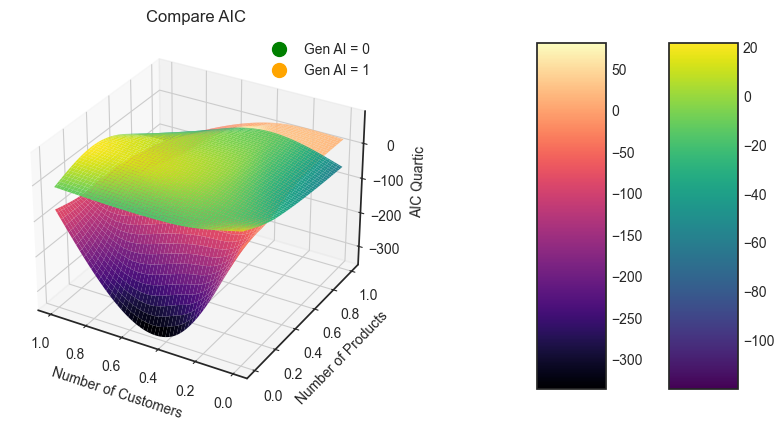

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines


# Creating a new figure for 3D plotting
fig = plt.figure(figsize=(10, 9)) 
ax = fig.add_subplot(111, projection='3d')

# 颜色映射
cmaps = ['viridis', 'magma']

# 分别处理 implement_gen_ai 为 0 和 1 的情况
for i, implement_gen_ai_value in enumerate([0, 1]):
    # Filtering data based on implement_gen_ai value
    subset = data[data['implement_gen_ai'] == implement_gen_ai_value]

    # Extracting data for the axes
    x = subset['n_customer']
    y = subset['n_product']
    z = subset['aic_quartic_original']

    # Creating a grid to interpolate
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.05 + 0.2*i)

legend1 = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=10, label='Gen AI = 0')
legend2 = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Gen AI = 1')
ax.legend(handles=[legend1, legend2], loc='upper right')

# Setting labels for each axis
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Number of Products')
ax.set_zlabel('AIC Quartic')

ax.set_title('Compare AIC')


# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])

# Showing the plot
plt.show()

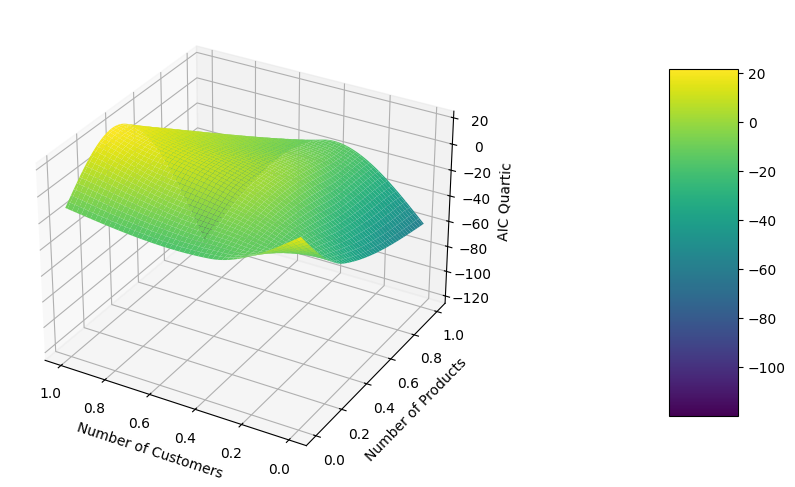

In [15]:
fig = plt.figure(figsize=(10, 9)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['viridis', 'magma']


subset = data[data['implement_gen_ai'] == 0]

# Extracting data for the axes
x = subset['n_customer']
y = subset['n_product']
z = subset['aic_quartic_original']

# Creating a grid to interpolate
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plotting the surface for each subset
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding a color bar for each surface
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.05 + 0.2*i)

# Setting labels for each axis
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Number of Products')
ax.set_zlabel('AIC Quartic')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])

# Showing the plot
plt.show()

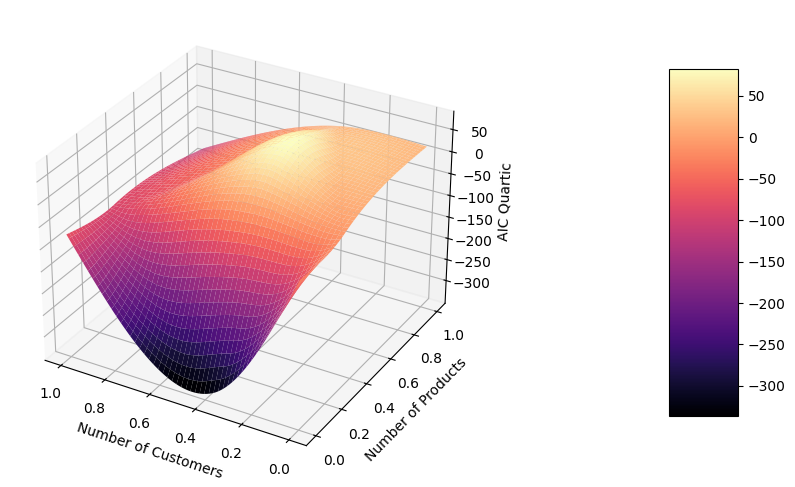

In [16]:
fig = plt.figure(figsize=(10, 9)) 
ax = fig.add_subplot(111, projection='3d')

# 颜色映射
cmaps = ['viridis', 'magma']


subset = data[data['implement_gen_ai'] == 1]

# Extracting data for the axes
x = subset['n_customer']
y = subset['n_product']
z = subset['aic_quartic_original']

# Creating a grid to interpolate
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plotting the surface for each subset
surf = ax.plot_surface(xi, yi, zi, cmap='magma', edgecolor='none')

# Adding a color bar for each surface
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.05 + 0.2*i)

# Setting labels for each axis
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Number of Products')
ax.set_zlabel('AIC Quartic')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])

# Showing the plot
plt.show()

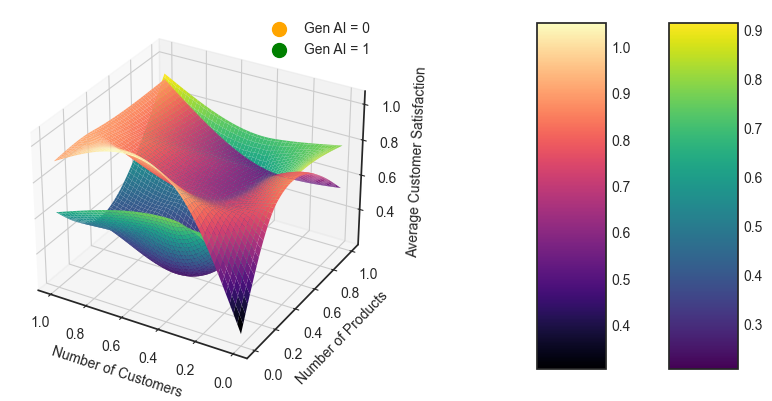

In [25]:
# Creating a new figure for 3D plotting
fig = plt.figure(figsize=(10, 9)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['viridis', 'magma']

# 分别处理 implement_gen_ai 为 0 和 1 的情况
for i, implement_gen_ai_value in enumerate([0, 1]):
    # Filtering data based on implement_gen_ai value
    subset = data[data['implement_gen_ai'] == implement_gen_ai_value]

    # Extracting data for the axes
    x = subset['n_customer']
    y = subset['n_product']
    z = subset['avg_satisfaction']

    # Creating a grid to interpolate
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.05 + 0.2*i)

legend1 = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=10, label='Gen AI = 0')
legend2 = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Gen AI = 1')
ax.legend(handles=[legend1, legend2], loc='upper right')

# Setting labels for each axis
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Number of Products')
ax.set_zlabel('Average Customer Satisfaction')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])

# Showing the plot
plt.show()

# Interaction Effects of AIC, Gen AI Capacity and Gen AI Learning Rate

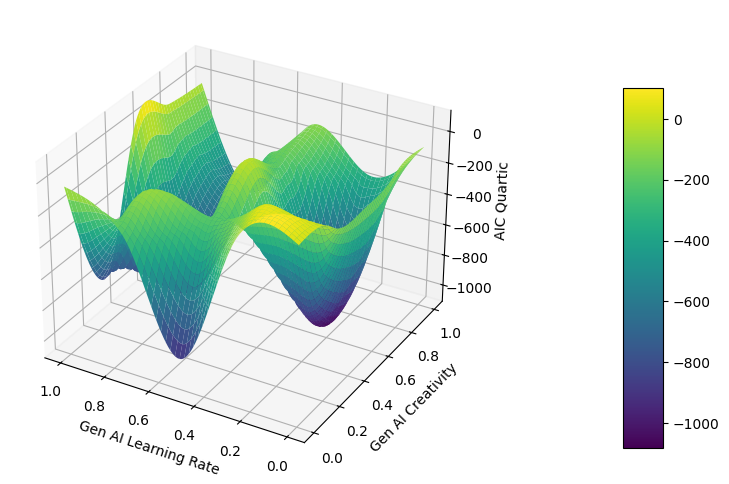

In [17]:
# Creating a new figure for 3D plotting
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot(111, projection='3d')

# Extracting data for the axes
x = data['gen_ai_learning_rate']
y = data['gen_ai_creativity']
z = data['aic_quartic_original']

# Creating a grid to interpolate
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Setting labels for each axis
ax.set_xlabel('Gen AI Learning Rate')
ax.set_ylabel('Gen AI Creativity')
ax.set_zlabel('AIC Quartic')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])


cbar_ax = fig.add_axes([0.99, 0.15, 0.05, 0.6])


# Adding a color bar which maps values to colors
fig.colorbar(surf, cax=cbar_ax, shrink=0.3, aspect=5)

# Showing the plot
plt.show()


# Interaction Effects of Customer Satisfaction, Gen AI Capacity and Gen AI Learning Rate

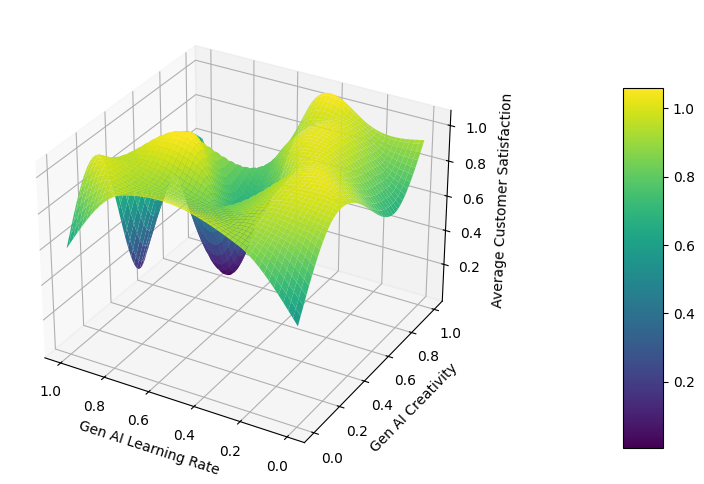

In [18]:
# Creating a new figure for 3D plotting
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot(111, projection='3d')

# Extracting data for the axes
x = data['gen_ai_learning_rate']
y = data['gen_ai_creativity']
z = data['avg_satisfaction']

# Creating a grid to interpolate
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Setting labels for each axis
ax.set_xlabel('Gen AI Learning Rate')
ax.set_ylabel('Gen AI Creativity')
ax.set_zlabel('Average Customer Satisfaction')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])

cbar_ax = fig.add_axes([0.99, 0.15, 0.05, 0.6])


# Adding a color bar which maps values to colors
fig.colorbar(surf, cax=cbar_ax, shrink=0.3, aspect=5)

# Showing the plot
plt.show()


# Independent Effects of Learning Rate

In [19]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


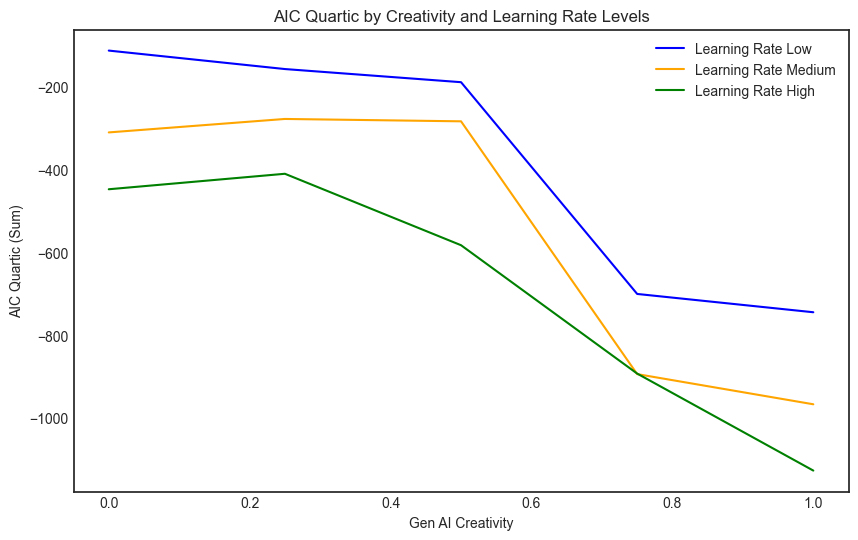

In [20]:
import matplotlib.pyplot as plt

# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot a line for each learning rate level
for rate_level, color in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green']):
    # Filter data for the corresponding learning rate level
    subset = data_normalized_df[data_normalized_df[rate_level] == 1]

    # Calculate the average AIC for each level of creativity_gen_ai
    average_aic = subset.groupby('creativity_gen_ai')['AIC Quartic (Sum) Original'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color)

# Add title and axis labels
plt.title('AIC Quartic by Creativity and Learning Rate Levels')
plt.xlabel('Gen AI Creativity')
plt.ylabel('AIC Quartic (Sum)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Independent Effects of Creativity

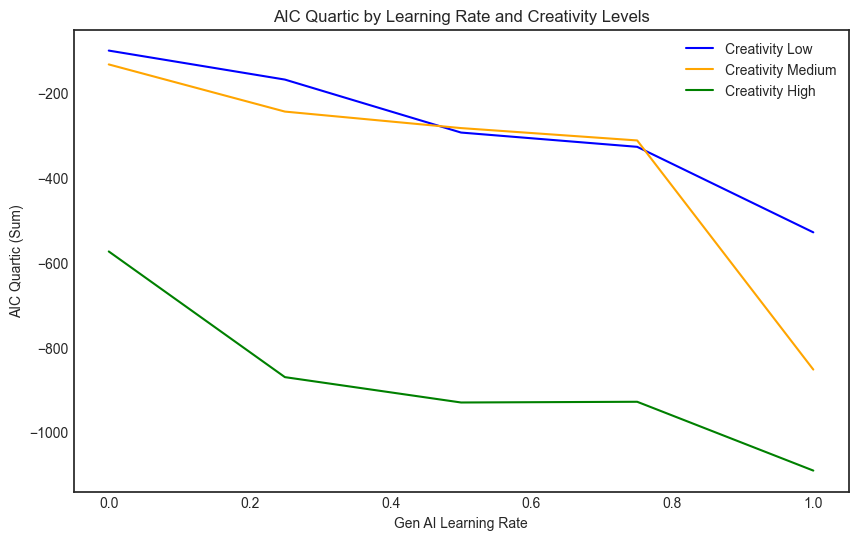

In [21]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot a line for each creativity_gen_ai level
for creativity_level, color in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green']):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data_normalized_df[data_normalized_df[creativity_level] == 1]

    # Calculate the average AIC for each level of learning_rate_gen_ai
    average_aic = subset.groupby('learning_rate_gen_ai')['AIC Quartic (Sum) Original'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color)

# Add title and axis labels
plt.title('AIC Quartic by Learning Rate and Creativity Levels')
plt.xlabel('Gen AI Learning Rate')
plt.ylabel('AIC Quartic (Sum)')

# Add a legend
plt.legend()

# Display the plot
plt.show()


# Interaction Effects of AIC, Customer Number and Product Number

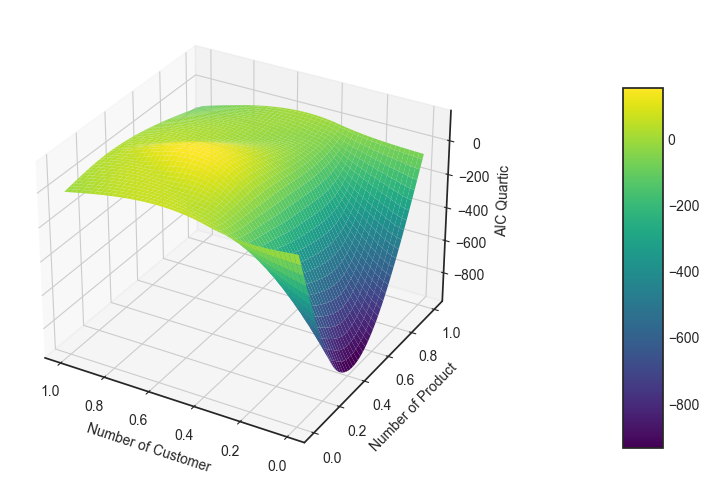

In [22]:
# Creating a new figure for 3D plotting
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot(111, projection='3d')

# Extracting data for the axes
x = data['n_customer']
y = data['n_product']
z = data['aic_quartic_original']

# Creating a grid to interpolate
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Setting labels for each axis
ax.set_xlabel('Number of Customer')
ax.set_ylabel('Number of Product')
ax.set_zlabel('AIC Quartic')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])


cbar_ax = fig.add_axes([0.99, 0.15, 0.05, 0.6])


# Adding a color bar which maps values to colors
fig.colorbar(surf, cax=cbar_ax, shrink=0.3, aspect=5)

# Showing the plot
plt.show()

# Interaction Effects of Customer Satisfaction, Customer Number and Product Number

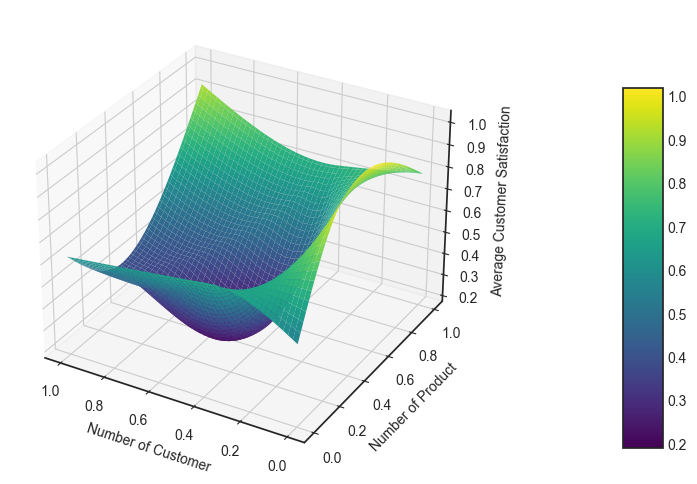

In [23]:
# Creating a new figure for 3D plotting
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot(111, projection='3d')

# Extracting data for the axes
x = data['n_customer']
y = data['n_product']
z = data['avg_satisfaction']

# Creating a grid to interpolate
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Setting labels for each axis
ax.set_xlabel('Number of Customer')
ax.set_ylabel('Number of Product')
ax.set_zlabel('Average Customer Satisfaction')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])


cbar_ax = fig.add_axes([0.99, 0.15, 0.05, 0.6])


# Adding a color bar which maps values to colors
fig.colorbar(surf, cax=cbar_ax, shrink=0.3, aspect=5)

# Showing the plot
plt.show()